```{contents}
:local:
:depth: 2
```

# Python Basics

This lecture introduces the core features of Python that will be used throughout the course. While not all students may have prior experience with Python, the materials are designed to be approachable and practical, emphasizing key workflows for data analytics in chemical engineering.

## Learning Objectives

By the end of this section, you should be able to:

- Compare Python to other scientific programming environments (MATLAB, R, Julia)
- Use Python packages and import structures appropriately
- Write basic functions, loops, and use object methods and attributes
- Read and visualize data using pandas and matplotlib
- Set up and manage coding environments using tools like conda, Jupyter, and Git
- Identify and resolve common Python pitfalls and type-related bugs

## Python Overview

### Why Python?

- Python is commonly used for data analysis and scientific computing
- Python is a full-featured programming language
- Python has an extensive ecosystem of user-contributed tools
- Python has a low barrier to entry and a gentle learning curve (especially compared to compiled languages)
- Python is growing rapidly in popularity and community support

Python is often compared to other tools commonly used in scientific computing and data analysis. Below are some brief comparisons.

### Python vs. MATLAB

**Advantages of Python**:
1. **Flexibility and portability**: Python is a general-purpose language and can be used across domains (web, automation, analysis).
2. **Free and open source**: Python is freely available and has a permissive license. MATLAB requires a license and is proprietary.
3. **Large community and resources**: Python has a huge user base, extensive documentation, and many tutorials.

**Disadvantages of Python**:
1. **Speed and efficiency**: MATLAB is optimized for matrix operations and can be faster for small to medium-size numerical problems.
2. **Installation and configuration**: Managing Python environments can be tricky (e.g., package dependencies, versioning).
3. **Lack of integrated IDE**: Python does not come with a default IDE like MATLAB (though tools like Spyder, VS Code, and Jupyter help).

### Python vs. Compiled Languages (C++, Fortran)

**Advantages of Python**:
1. **Rapid development**: Python allows faster prototyping and shorter code.
2. **Ease of use**: Code is typically easier to write and understand.
3. **High-level abstractions**: Useful for scripting, data analysis, and visualization.

**Disadvantages of Python**:
1. **Performance**: Python is generally slower than compiled languages due to its interpreted nature.
2. **Less control**: Compiled languages allow finer control over memory and performance-critical details.

### Python vs. R

**Advantages of Python**:
1. **General-purpose capabilities**: Python is more flexible for tasks beyond statistics (e.g., web scraping, automation, machine learning).
2. **Integration**: Better tools for integrating with other languages and platforms.
3. **Scalability**: Python often scales better for large data applications and production systems.

**Disadvantages of Python**:
1. **Statistical modeling**: R has more specialized libraries for certain statistical models and exploratory data analysis.
2. **Plotting defaults**: R’s base plotting and `ggplot2` often produce more publication-ready visuals with less effort.

### Python vs. Julia

**Advantages of Python**:

Although Python will be used in course notes and homeworks, students are welcome to use other languages for final projects if they are better suited to the task.
1. **Mature ecosystem**: Python has a much broader ecosystem of packages and tools.
2. **Stability and support**: Python has a long history and wide adoption in industry and academia.

**Disadvantages of Python**:
1. **Performance**: Julia often outperforms Python for numerical code due to its just-in-time (JIT) compilation.
2. **Simplicity for scientific code**: Julia syntax can resemble MATLAB or NumPy, with better performance out-of-the-box.

```{note}
Python is the default language for the course notes and homeworks in this course. However, for your course project you may choose other programming languages based on the nature of the problem. If you choose to work with another language, ensure that everyone on your team is comfortable with it (or find a way to delegate work so that you can use multiple languages).

Course instructors will only be able to provide support for Python, although there is a support team from MathWorks that can also provide advice on MATLAB. If you are interested in using MATLAB for your project, please let instructors know so that we can connect you with the MathWorks team.
```


### Python "packages"

Unlike MATLAB, Python is organized into "packages" (or "modules") that group related functionality. Some packages are part of the [standard library](https://docs.python.org/3/library/) and are available in any Python installation. Others are third-party add-ons that must be installed separately.

Here’s how to import and use functions from the `math` package:

In [1]:
import math

print(math.exp(1))

2.718281828459045


Functions can also be imported directly, or with an alias:

In [2]:
from math import exp
import math as m

print(m.exp(1))
print(exp(1))
print(m.e)

2.718281828459045
2.718281828459045
2.718281828459045


One of the most important non-standard packages is [`numpy`](https://numpy.org/), which provides numerical and linear algebra functions. It is commonly imported as `np`:

In [3]:
import numpy as np

A = np.array([[1,2],[3,4]])
A

array([[1, 2],
       [3, 4]])

In NumPy, all arrays (1D, 2D, etc.) are represented using a single type: the `ndarray`. One major difference from MATLAB is that **elementwise operations are the default** in NumPy:

In [4]:
B = np.array([[2,2],[2,2]])

A * B  # elementwise multiplication

array([[2, 4],
       [6, 8]])

Matrix multiplication can be performed using `np.dot()` or the `@` operator:

In [5]:
C = np.dot(A, B)
C

array([[ 6,  6],
       [14, 14]])

In [6]:
D = A @ B
D

array([[ 6,  6],
       [14, 14]])

Indexing arrays in NumPy is similar to MATLAB with **three key differences**:

- Square brackets `[]` are used instead of parentheses
- Indexing starts from **0** instead of 1
- Negative indexes count from the end (e.g. `-1` means last element)

In [7]:
print(A[0,0])
X = np.array([[1., 2., 3.], [4., 5., 6.]])
print(X[-2])

1
[1. 2. 3.]


You can take "slices" of arrays using the colon syntax:

```python
start:end      # slice from index 'start' to 'end-1'
start:end:step # optional 'step' size
```

Example:

In [8]:
a_col = A[:,0]              # first column
a_col_2 = a_col.reshape(-1, 1)  # make column vector
a_col_2.shape
A_2 = A.reshape(4,1)
print("A matrix reshaped:\n", A_2)
a_col

A matrix reshaped:
 [[1]
 [2]
 [3]
 [4]]


array([1, 3])

There is a helpful [MATLAB-to-Numpy cheat sheet](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html) that compares syntax and behavior across the two languages.

```{note}
While Python’s package system provides **enormous flexibility**, it can also lead to compatibility issues. Different packages may depend on different versions of Python or each other, which can result in version conflicts and installation bugs. Tools like `conda`, `venv`, or `pipenv` are often used to isolate environments and manage dependencies. `conda` is the recommended environment manager for this course, but it is not required.
```

```{admonition} Exercise
:class: tip

Try the following:

1. Import the `math` package and use it to print the natural log of 10.
2. Import `numpy` and create a 2×2 matrix.
3. Multiply the matrix by itself using both `*` and `@` — observe the difference.

What do these results tell you about NumPy's default behavior?
```

## For loops and Functions

Python syntax is designed to be readable and intuitive. Unlike many other languages, Python uses **indentation** to define blocks of code rather than braces or keywords. Below are a few foundational elements that will be used throughout this course.

### For loops

Python `for` loops are simple and flexible. A common pattern is to iterate over elements in a list or array. The `range()` function is often used to loop over indices:

In [9]:
for i in range(5):
    print("i =", i)

i = 0
i = 1
i = 2
i = 3
i = 4


You can also iterate directly over list contents:

In [10]:
mylist = ['A', 'B', 'C']

for item in mylist:
    print("item =", item)

item = A
item = B
item = C


Python does not use an index variable unless you explicitly define it. If you need both the index and the value, the `enumerate()` function is useful:

In [11]:
for i, item in enumerate(mylist):
    print(f"Index {i} contains {item}")

Index 0 contains A
Index 1 contains B
Index 2 contains C


---

### Defining Functions

Functions in Python are defined using the `def` keyword. They can take **positional arguments** (required, in order) and **keyword arguments** (optional, with defaults). Python is more flexible than MATLAB in how arguments are handled.

In [12]:
from math import exp  # required for use in the function

def gaussian(x, mean=0, stdev=1.0):
    g = exp(-(x - mean)**2 / (2 * stdev**2))
    return g

print(gaussian(0.5))
print(gaussian(0.5, 0))
print(gaussian(0.5, stdev=1, mean=0))
print(gaussian(0.5, 0, 1))

0.8824969025845955
0.8824969025845955
0.8824969025845955
0.8824969025845955


Keyword arguments allow inputs to be given in any order, as long as they are named explicitly.

---

### Return values

Functions return values using the `return` keyword. If no value is returned, Python implicitly returns `None`.

In [13]:
def null_function():
    x = 5
    y = x**2
    z = exp(-y)
    print(x)
    # no return statement

new_var = null_function()
print("Returned value:", new_var)

5
Returned value: None


This can be contrasted with a version that explicitly returns a value:

In [14]:
def return_function():
    x = 5
    y = x**2
    z = exp(-y)
    return x

new_val = return_function()
print("Returned value:", new_val)

Returned value: 5


```{note}
In general, if you want a function to produce a result that can be stored or passed to other code, you must use `return`.

You will not have to write many functions from scratch in this course, but you will often need to **modify existing code**. Understanding function structure will save time and improve clarity in your work.
```

```{admonition} Exercise
:class: tip

Write a function called `arrhenius` that computes the rate constant \( k \) using the Arrhenius equation:

$$
k = A \cdot \exp\left(\frac{-E_a}{RT}\right)
$$

The function should:

- Take one **positional argument**: `T` (temperature in Kelvin)
- Take two **keyword arguments**:
  - `A` (pre-exponential factor, default = \(1 \times 10^{13}\))
  - `Ea` (activation energy in J/mol, default = 75000)

Use \( R = 8.314 \, \text{J/mol·K} \) in your function.

Test your function at multiple temperatures (e.g., 300 K, 500 K, 700 K) and print the corresponding rate constants.

No plotting is required.
```

## Classes, attributes, and methods

Another significant difference between MATLAB and Python is that Python is a highly **object-oriented** language. This means that most variables in Python are actually *objects*, which are instances of a particular *class*. Each class has associated **attributes** (data) and **methods** (functions that act on the object).

Even simple variables like lists or arrays have associated methods and attributes. You can inspect these using the `dir()` function:

In [15]:
import numpy as np

A = np.array([[1, 2], [3, 4]])
dir(A)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_namespace__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__class_getitem__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__

The items that begin and end with double underscores (`__`) are called ["magic methods" or "dunder methods"](https://www.geeksforgeeks.org/python/dunder-magic-methods-python/) (short for double underscore). These are used internally by Python and should generally be avoided unless you know what you're doing.

---

### Attributes vs. methods

- An **attribute** is a variable stored inside the object (e.g., `.shape` or `.dtype`).
- A **method** is a function associated with the object (e.g., `.mean()` or `.reshape()`).

You do **not** use parentheses for attributes:

In [16]:
A.shape

(2, 2)

You **do** use parentheses to call methods:

In [17]:
print(A.mean())
print(A.std())

2.5
1.118033988749895


Python often provides both a method and a standalone function for the same operation:

In [18]:
np.mean(A)
type(A)

numpy.ndarray

---

### A note on list objects

In contrast to NumPy arrays, Python lists do not support matrix multiplication. Attempting to use the `@` operator (or `np.dot`) on native lists will result in an error.

In [19]:
L = [[0, 1],[2, 3]]

try:
    result = L @ L
except TypeError as e:
    print("Matrix multiplication is not supported for lists:")
    print(e)

Matrix multiplication is not supported for lists:
unsupported operand type(s) for @: 'list' and 'list'


```{note}
Python's `try/except` syntax lets you gracefully handle errors. We will explain this structure in more detail later in the course.
```

This is one reason NumPy arrays are preferred for numerical work.

---

### Using help and documentation

You can use the built-in `help()` function to learn more about any object, method, or function. This is very useful for exploring libraries and unfamiliar syntax:

In [20]:
help(A.mean)

Help on built-in function mean:

mean(...) method of numpy.ndarray instance
    a.mean(axis=None, dtype=None, out=None, keepdims=False, *, where=True)
    
    Returns the average of the array elements along given axis.
    
    Refer to `numpy.mean` for full documentation.
    
    See Also
    --------
    numpy.mean : equivalent function



You can also access method-specific options using keyword arguments:

In [21]:
A.mean(axis=1)

array([1.5, 3.5])

This computes the row-wise average of matrix `A`.

---

```{admonition} Exercise
:class: tip

Inspect and use object attributes and methods:

1. Create a NumPy array `B = np.array([[3, 1, 4], [1, 5, 9]])`
2. Use `dir(B)` to find all available methods.
3. Use `type(B)` to verify its class.
4. Use `help(B.sum)` to learn about the `.sum()` method.
5. Call `B.sum(axis=0)` and `B.sum(axis=1)` to compute column-wise and row-wise totals.

Try comparing this to equivalent operations in MATLAB or by using plain Python lists.
```

## Reading and Visualizing Data

Python has powerful tools for reading, transforming, and visualizing data. This section introduces two core packages:

- `pandas`, used for reading and organizing data
- `matplotlib`, used for plotting

We’ll use a sample dataset called `ethanol_IR.csv`, which contains infrared absorbance data.

---

### Reading in data

The `pandas` package is particularly useful for this. It has many helpful features that we will discuss throughout the course, but for now we will just show how to read in a .csv file and convert it into a numpy array.

In the example below, we read a dataset from a file named `"ethanol_IR.csv"`, which contains infrared absorbance measurements for ethanol. The resulting object `df` is a **DataFrame**, which behaves like a table (similar to a spreadsheet).

In [22]:
import pandas as pd

# Read in the ethanol infrared spectroscopy dataset (CSV format)
df = pd.read_csv("data/ethanol_IR.csv")

# Display the first 10 rows of the dataset to understand its structure
df.head(10)

,wavenumber [cm^-1],absorbance
0,461.563000,0.015
1,466.250502,0.014
2,470.938003,0.014
3,475.625505,0.014
4,480.313007,0.013
5,485.000509,0.012
6,489.688010,0.012
7,494.375512,0.012
8,499.063014,0.012
9,503.750516,0.013


In [23]:
X = df.values
X.shape

(714, 2)

The `.values` attribute converts the DataFrame into a NumPy array. This is useful because many scientific computing tools (like `numpy` and `scikit-learn`) expect data in this format.

In [24]:
X[:,1]

array([ 0.015,  0.014,  0.014,  0.014,  0.013,  0.012,  0.012,  0.012,
        0.012,  0.013,  0.013,  0.013,  0.014,  0.014,  0.014,  0.014,
        0.013,  0.013,  0.013,  0.013,  0.012,  0.011,  0.008,  0.008,
        0.007,  0.005,  0.005,  0.004,  0.003,  0.003,  0.003,  0.002,
        0.001,  0.001,  0.   ,  0.   , -0.001, -0.002, -0.002, -0.003,
       -0.003, -0.003, -0.003, -0.003, -0.004, -0.003,  0.002, -0.002,
       -0.003, -0.003, -0.003, -0.005, -0.006, -0.006, -0.006, -0.006,
       -0.009, -0.006, -0.005, -0.003, -0.003, -0.003, -0.003, -0.002,
       -0.002, -0.002, -0.001,  0.   ,  0.002,  0.003,  0.005,  0.005,
        0.006,  0.007,  0.007,  0.007,  0.007,  0.006,  0.006,  0.007,
        0.008,  0.008,  0.011,  0.019,  0.032,  0.055,  0.077,  0.097,
        0.099,  0.09 ,  0.128,  0.099,  0.131,  0.114,  0.103,  0.087,
        0.054,  0.034,  0.021,  0.013,  0.008,  0.007,  0.005,  0.003,
        0.003,  0.003,  0.004,  0.005,  0.007,  0.011,  0.016,  0.021,
      

Once the data is in NumPy format, we can access columns using slicing. Here we select all rows from column 1, which corresponds to absorbance.



### Reading from Excel files

The `pandas` library can also read data from Excel files using the `read_excel()` function. This works similarly to `read_csv()`:

In [25]:
try:
    df_excel = pd.read_excel("data/ethanol_IR.xlsx")
    display(df_excel.head())
except Exception as e:
    print("Excel file could not be read:", e)

Excel file could not be read: [Errno 2] No such file or directory: 'data/ethanol_IR.xlsx'


```{note}
Reading Excel files requires an additional dependency such as `openpyxl` or `xlrd`, and may not work if Microsoft Excel is not installed on your system. Use `.csv` files whenever possible for cross-platform compatibility.
```


---

### Plotting data

Plotting data in Python is also similar to Matlab, and the main library, `matplotlib` is designed to work similarly. It is rather powerful, but can also be clunky. In particular, plots cannot be easily edited after they are generated, so all modifications must be done using code. There is a [gallery of Matplotlib examples](https://matplotlib.org/gallery.html), along with associated source code, that can be very useful if you want to create fancier plots.

Typically we will make very simple plots in this course. An example of the `ethanol_IR.csv` dataset is provided below:

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt  # standard and recommended import convention
#import pylab as plt #equivalent import, but not recommended
plt.style.use('../settings/plot_style.mplstyle')

```{note}
The `plot_style.mplstyle` file in the `settings` directory is used to ensure consistent appearance across all plots in the notebooks. You can ignore it or remove the line if you're working outside the course materials — it is optional.
```

In [27]:
x = X[:,0] #take the first column as independent variable
y = X[:,1] #take the second column as dependent variable

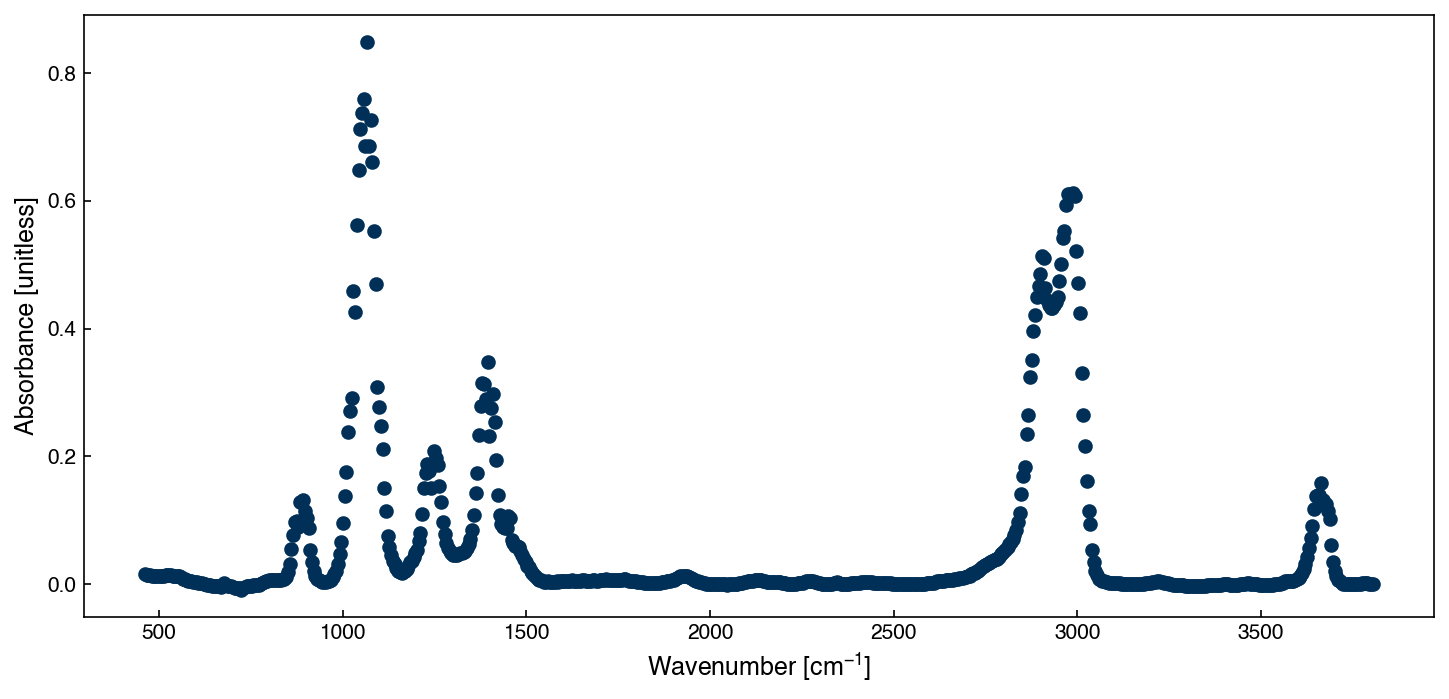

In [28]:
fig, ax = plt.subplots(figsize=(10, 5)) #create a new figure object (fig) with an associated axis object (ax)
ax.plot(x,y,marker='o', ls='none') # marker='o' draws circles at each point; ls='none' omits connecting lines
ax.set_xlabel('Wavenumber [cm$^{-1}$]')
ax.set_ylabel('Absorbance [unitless]');

You can also manually adjust the visible x- or y-axis range using `set_xlim()` and `set_ylim()`:

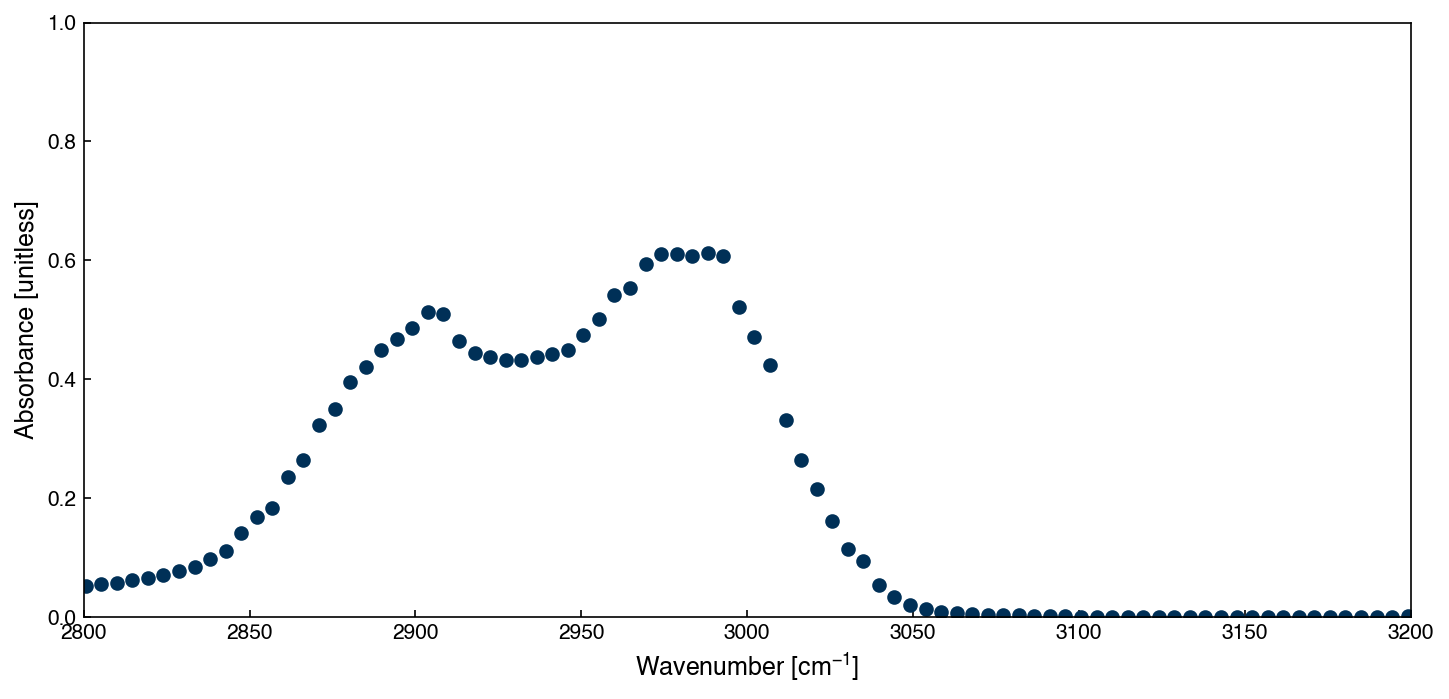

In [29]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x, y, marker='o', ls='none')  
ax.set_xlabel('Wavenumber [cm$^{-1}$]')
ax.set_ylabel('Absorbance [unitless]')
ax.set_xlim(2800, 3200)
ax.set_ylim(0, 1.0);

```{admonition} Exercise
:class: tip

Visualize a subset of the ethanol data:

1. Create a new variable that stores only rows 65 to 230 of the dataset (you can slice the `X` array).
2. Extract wavenumber and absorbance from this subset.
3. Plot the new slice of data with appropriate axis labels.
4. Adjust the axis limits to zoom in on the peak region.

What changes do you notice in the shape or features of the spectrum?
```

## Developer Tools

Course assignments will be hosted through **Vocareum**, which allows you to interact with code in a consistent online environment — no installation required. However, we strongly recommend that you also learn to work **locally**, so that you're prepared for independent work and research projects. The tools in this section will help you do that.

---

### Integrated Development Environments (IDE's)

In this course, we use Jupyter Notebooks to display code and submit homework. While notebooks are convenient for sharing and grading, they aren’t always ideal for learning or large-scale programming.

You may find it easier to use an IDE such as:

- **Spyder** (similar to MATLAB)
- **VS Code** (very flexible and widely used)
- **PyCharm** or **Thonny** (other good options)

You can copy code from a notebook into your IDE, test and debug it there, and then paste your results back into the notebook. Jupyter notebooks can also be exported as `.py` files (`File → Download as → .py`) if you want to move work into an IDE.

---

### Virtual environments (conda)

To manage dependencies and avoid version conflicts, we recommend using **conda**. This lets you isolate packages for each project or course.

The easiest way to set up the course environment is:

```bash
conda env create -f environment.yml
conda activate da4che
```

This uses the `environment.yml` file provided with the course to install the required versions of Python and all packages.

```{note}
You are free to use other environment tools like `venv` or `pipenv`, but we can only provide support for `conda`.
```

---

### Collaboration tools

Many tools are available to help you collaborate on code, whether you're working live or asynchronously.

#### Git and GitHub

**Git** is a version control system, and **GitHub** is a hosting platform. You can track changes, revert mistakes, and share code with collaborators. Some common commands include:

```bash
git init
git add file.py
git commit -m "explanation"
git push
```

GitHub is not required in this course, but you may want to use it for your final project or in your future research. A great place to start is the [GitHub Hello World tutorial](https://docs.github.com/en/get-started/quickstart/hello-world).

#### Google Colab

[Google Colab](https://colab.research.google.com/) lets you write and run Python code in the cloud, with no setup. It supports real-time collaboration and is especially useful when working on shared notebooks or quick experiments.

You can upload any `.ipynb` notebook and run it using Google’s servers — including access to GPUs.

#### Other collaborative coding tools

If you're working in real time with a partner or team, consider these tools:

- **VS Code Live Share**: collaborative editing in VS Code
- **JupyterHub**: shared notebooks on a central server (common in courses or labs)
- **Replit**: browser-based IDE with multi-user editing
- **CodeTogether**: collaboration across multiple IDEs

These tools support shared coding sessions, pair programming, and debugging help.

---

### Using LLMs for programming

Language models like ChatGPT or GitHub Copilot can be helpful — but use them wisely.

**Best practices**:
- Ask focused questions. Include goals and sample code.
- Work in small chunks rather than giving complex prompts.
- Use them for debugging, syntax help, and suggestions — not as a substitute for understanding.
- Never put any content generated by others into an LLM without permission.
- Always verify the output. LLMs can generate incorrect or outdated code.
- Always acknowledge that AI tools were used.

You may use LLMs during this course, but you are responsible for the code you submit. You are required to acknowledge any AI tools that were used in generating a response. You will not be penalized for using AI tools, but you should not simply copy/paste from any AI tool. You should carefully review and edit any AI generated code for clarity. The [institute guidelines](https://oit.gatech.edu/ai/guidance) on AI are a good resource for broader use of AI.

```{note}
AI tools were heavily used in revising these lecture notes! The original Jupyter notebooks are [available for reference](https://github.com/medford-group/data_analytics_ChE). Revisions were done iteratively, and instructors have verified all content, but some typos or artifacts may remain. Please alert instructors if you see any issues in the new version.
```

```{admonition} Ethics of AI models
:class: caution
Like many issues in modern society, the use of AI is ethically complicated. Creation of these models involved many unethical practices, such as the use of [underpaid workers to process traumatic training data](https://time.com/6247678/openai-chatgpt-kenya-workers/) and likely [violations of intellectual property rights](https://hbr.org/2023/04/generative-ai-has-an-intellectual-property-problem), and the use of AI tools consumes [massive amounts of energy at scale](https://www.technologyreview.com/2025/05/20/1116327/ai-energy-usage-climate-footprint-big-tech/). However, these models exist now, and have the potential to improve society by advancing technology. The formal ethics and regulations on AI use are evolving, and to my knowledge there is no current consensus. My personal view is that the tools should be used judiciously on tasks that have the potential to improve society (e.g. education and technology development). Use for frivolous tasks should be minimized, and users should always be aware of the ethical gray areas involved in the creation and use of AI models. 
```

```{admonition} Exercise
:class: tip

Try working in a different environment:

1. Open one of your Jupyter notebooks from this course using **VS Code** or **Spyder**.
2. Try exporting a `.ipynb` notebook as a `.py` file using the Jupyter interface (`File → Download as → Python (.py)`).
3. Open the exported file in your local editor and run a few lines.
4. (Optional) Create a conda environment using the provided `environment.yml` and try running your code there.

What differences do you notice compared to working in Vocareum?
```

## Python Pitfalls and Advanced Features

Python is relatively simple to learn, but there are a few common pitfalls that can cause confusing errors or subtle bugs. This section highlights some of the most important ones to watch out for.

---

### Tabs and spaces

Python uses indentation to define scope — this means the number and type of spaces is significant. One common error comes from mixing **tabs** and **spaces**. Python will not allow inconsistent indentation.

In [30]:
def hello_world():
    print("Hello World")
    print('...with space indent works.')
#	print('…with tab indent doesn’t')  # <- copied from a different editor

hello_world()

Hello World
...with space indent works.


If you uncomment the line above, it will throw an error in many environments. Jupyter automatically converts tabs into spaces, but if you're editing in another environment, always choose **spaces only** and be consistent.

---

### NumPy array copying (views vs. copies)

In NumPy, slicing an array returns a **view**, not a copy. If you modify the slice, the original array is changed too.

In [31]:
import numpy as np

A = np.array([[1., 2., 3.], [4., 5., 6.], [7., 8., 9.]])
b = A[0, :]   # this is a view
b[0] = 10     # modifies A as well
print(A)

[[10.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]]


To avoid this, explicitly make a copy:

In [32]:
c = A[1, :].copy()
c[1] = 15
print(A)

[[10.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]]


---

### Integer type casting

By default, NumPy tries to preserve data types. This can lead to surprising truncation if you assign a float to an integer array:

In [33]:
A = np.array([1, 2])  # integer array
A[0] = 0.15           # silently truncated
print(A)

[0 2]


To prevent this, define your array with floats:

In [34]:
B = np.array([1., 2.])
B[0] = 0.15
print(B)

[0.15 2.  ]


Or use `dtype='float64'` for explicit control.

---

### Lambda functions vs. variable names

Python uses the `lambda` keyword to define anonymous functions:

In [35]:
sincos = lambda x: np.sin(x) * np.cos(x)
sincos(0.5)

np.float64(0.42073549240394825)

This means you cannot use `lambda` as a variable name:

In [36]:
# lambda = 0.1  # SyntaxError
lamda = 0.1
sincos(lamda)

np.float64(0.09933466539753062)

If you want to use the Greek letter λ as a variable, just spell it differently (e.g., `lamda`).

---
### Dimensions of vectors and matrices

Unlike Matlab, Python supports true 1-D vectors that are neither column nor row vectors. It also of course supports explicit column and row vectors. A common issue, especially when working with `scikit-learn` (a common package that you will see a lot of in this course), is that the models will expect inputs to be explicit 2-D matrixes with a `shape` attribute of `(n_samples, n_features)`. Failure to do this will throw errors that can be very confusing, but there is an easy fix: you can use the `.reshape(-1, 1)` method to create a 1-D vector into a 2-D feature matrix. If you want to convert back, you can use the `.ravel()` method to "unravel" any matrix into a 1-D vector.

In [37]:
import numpy as np
from sklearn.linear_model import LinearRegression

x = np.linspace(0, 10, 5)    # (5,)
y = 2*x + 1                  # (5,)

X = x.reshape(-1, 1)         # (5, 1)
y1d = y.ravel()              # (5,)
print(X.shape, y1d.shape)

(5, 1) (5,)


---

### Iterating with `zip`

It is common that you will want to iterate through several lists at the same time, keeping everything synced. There are lots of ways to do this, but a common one is to use the `zip` function, which can be a little confusing at first. The `zip` function will "zip" two lists together, and you can also "unzip" by using the `zip(*pairs` syntax. It's a slightly advanced feature, and you don't need to use it in your code, but you will see it a lot in examples throughout the lecture notes.

In [38]:
xs = [1, 2, 3]
ys = [2, 4, 6]

zipxy = list(zip(xs, ys))
print(zipxy)

#this is the most common usage
for x, y in zip(xs, ys):
    print(x, y)

# Unzip:
x_back, y_back = zip(*zipxy)
print(x_back, y_back)

[(1, 2), (2, 4), (3, 6)]
1 2
2 4
3 6
(1, 2, 3) (2, 4, 6)


### Floating point comparison

Due to how floating-point numbers are represented, equality tests may fail even when numbers "look" the same:

In [39]:
a = 0.1 + 0.2
b = 0.3
print(a == b)           # False
print(np.isclose(a, b)) # True

False
True


Use `np.isclose()` for comparison — especially in grading scripts or scientific code.

---

### Try/except blocks

To catch and handle errors in your code gracefully, use `try/except`:

In [40]:
try:
    x = 1 / 0
except ZeroDivisionError as e:
    print("Caught an error:", e)

Caught an error: division by zero


This is useful when reading files, calling risky functions, or interacting with user input.

---

### Assert and `np.isclose`

You can use `assert` to enforce expectations in your code or for autograding:

In [41]:
a = 0.1 + 0.2
b = 0.3

assert np.isclose(a, b), "Floating point comparison failed"

This is cleaner than writing long `if` statements and is common in unit tests and grading scripts.

---

~~~{admonition} Exercise
:class: tip

The function below is meant to return a new array that contains just the first row of matrix `A`, which can be modified without affecting the original.

```python
def first_row(A):
    return A[0, :]
```

Try the following:

```python
A = np.array([[1, 2], [3, 4]])
B = first_row(A)
B[0] = 99
print(A)
```

What happens? Modify the function so that `A` is not affected when `B` is changed.
~~~


## Recommended Reading

- [Official Python Tutorial](https://docs.python.org/3/tutorial/)
- [NumPy User Guide](https://numpy.org/doc/stable/user/)
- [Pandas Getting Started Guide](https://pandas.pydata.org/docs/getting_started/index.html)
- [Matplotlib Gallery](https://matplotlib.org/stable/gallery/index.html)
- [GitHub Hello World Guide](https://docs.github.com/en/get-started/quickstart/hello-world)